In [117]:
data_rhein = pd.read_csv("C:/Users/olive/OneDrive/Dokumente/GitHub/Test123/data_rhein_incl_km.csv")
print(data_rhein.keys())


Index(['Unnamed: 0', 'Kürzel', 'Status Nr. ', 'Labornummer', 'Jahr', 'Datum',
       'Dauer', 'Mittl.Abfluss', 'Abflussumme', 'Temp.(BAFU)', 'pH(BAFU)',
       'Leitf. 25°C(BAFU)', 'Sauerstoff', 'Sauerstoffsätt.%',
       'Mittl.Abfluss.1', 'Abflussumme.1', 'Temp.(BAFU).1', 'pH(BAFU).1',
       'Leitf. 25°C(BAFU).1', 'Sauerstoff.1', 'Sauerstoffsätt.%.1',
       'pH (EAWAG)', 'Leitf.20°C (EAWAG)', 'Gesamthärte', 'Alkalinität',
       'Calcium', 'Magnesium', 'Nitrit', 'Nitrat', 'Ammonium',
       'Kjeldahl-Stickstoff', 'Gesamt-Stickstoff (filtriert)',
       'Gesamt-Stickstoff', 'DRP', 'Gesamt-Phosphor',
       'Gesamt-Phosphor (filtriert)', 'Chlorid', 'Kieselsäure', 'Sulfat',
       'Natrium', 'Kalium', 'Eisen', 'Chem.Sauerstoffbedarf', 'TOC', 'DOC',
       'Schwebstoffe', 'Chrom', 'Zink', 'Kupfer', 'Cadmium', 'Blei', 'Nickel',
       'Quecksilber', 'NP', 'NP1EO', 'NP2EO', 'NP3EO', 'Calcium (IC)',
       'Rheinkilometer', 'Status Nr.', 'year', 'month', 'day'],
      dtype='object')


In [118]:
import pandas as pd

data = pd.DataFrame(data_rhein)
data.head

<bound method NDFrame.head of       Unnamed: 0 Kürzel  Status Nr.   Labornummer    Jahr  \
0              0     RE          7.0      16354.0  1975.0   
1              1     RE          1.0      16487.0  1975.0   
2              2     RE          4.0      16619.0  1975.0   
3              3     RE          1.0      16705.0  1975.0   
4              4     RE          1.0      16843.0  1975.0   
...          ...    ...          ...          ...     ...   
3108        3108     SC          NaN       1984.0  1984.0   
3109        3109     SC          NaN      39714.0  1984.0   
3110        3110     SC          NaN      39746.0  1984.0   
3111        3111     SC          NaN      39792.0  1984.0   
3112        3112     SC          NaN      39840.0  1984.0   

                    Datum  Dauer  Mittl.Abfluss  Abflussumme  Temp.(BAFU)  \
0     1975-05-26 11:15:00  168.0            NaN          NaN          NaN   
1     1975-06-02 11:45:00  169.0         683.00     415.5372        13.70   
2     

In [119]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0 Kürzel  Status Nr.   Labornummer    Jahr  \
0              0     RE          7.0      16354.0  1975.0   
1              1     RE          1.0      16487.0  1975.0   
2              2     RE          4.0      16619.0  1975.0   
3              3     RE          1.0      16705.0  1975.0   
4              4     RE          1.0      16843.0  1975.0   
...          ...    ...          ...          ...     ...   
3108        3108     SC          NaN       1984.0  1984.0   
3109        3109     SC          NaN      39714.0  1984.0   
3110        3110     SC          NaN      39746.0  1984.0   
3111        3111     SC          NaN      39792.0  1984.0   
3112        3112     SC          NaN      39840.0  1984.0   

                    Datum  Dauer  Mittl.Abfluss  Abflussumme  Temp.(BAFU)  \
0     1975-05-26 11:15:00  168.0            NaN          NaN          NaN   
1     1975-06-02 11:45:00  169.0         683.00     415.5372        13.70   
2 

In [120]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [121]:
data_rhein["DOC"].replace('', np.nan, inplace=True)
data_rhein.dropna(subset=["DOC"], inplace=True)

In [141]:
X = data_rhein[["Temp.(BAFU)","pH(BAFU)","Leitf. 25°C(BAFU)",
                "Sauerstoff","Sauerstoffsätt.%","pH (EAWAG)",
                "Leitf.20°C (EAWAG)","Calcium",
                "Magnesium","Nitrit","Nitrat",
                "Kjeldahl-Stickstoff","Gesamt-Stickstoff",
                "Gesamt-Phosphor","Chlorid","Sulfat",
                "Kalium",
                "Schwebstoffe","Kupfer",
                "Quecksilber"]]
Y = data_rhein[["DOC"]]

In [142]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)
data_dmatrix

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [144]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.4,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [145]:
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

[09:36:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [147]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.474842


In [148]:
params = {"objective":"reg:linear",'colsample_bytree': 0.6,'learning_rate': 0.4,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results

[09:36:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:36:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:36:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.858689,0.014069,0.865861,0.038567
1,0.640573,0.012952,0.649340,0.044619
2,0.533033,0.013298,0.545941,0.043120
3,0.479952,0.013622,0.497675,0.038541
4,0.453340,0.011357,0.476237,0.035959
5,0.438427,0.010941,0.465355,0.032974
6,0.428082,0.011424,0.457983,0.029434
7,0.419669,0.010777,0.454456,0.028141
8,0.411185,0.011327,0.449953,0.027268
9,0.405143,0.011249,0.447304,0.026584


NameError: name 'plt' is not defined

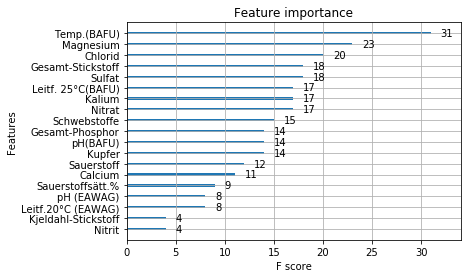

In [149]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

In [150]:
xg_reg

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [152]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, Y)
preds1 = xg_reg.predict(X_test)

# Print the best parameters and lowest RMSE
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[09:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[09:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.5s finished


[09:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters found:  {'n_estimators': 25, 'max_depth': 3}
Lowest RMSE found:  0.49259679495142616


In [156]:
from fastai import *
from fastai.tabular import *
tabular_learner.docs

ModuleNotFoundError: No module named 'fastai'